

* Introduccioin al sampling
* Que es la inferencia estadistica: poblacion/parametro/muestra... Parámetros vs estadísticos
* Tipos de muestreo: aleatorio, estratificado, boostrapping
* ¿Qué es la distribución muestral?
* Qué es un sesgo?
* Dos teoremas importantes:
    * Ley de los grandes numeros
    * Teorema central del límite
* Bootstrapping
* Intervalos de confianza
* Test de hipótesis
* ¿Qué es un p-value?
   


# Estadística inferencial
**Se llama estadística inferencial o inferencia estadística a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades**, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones.

## Muestreo
![alt text](https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG)

Dado que rara vez tendremos el conjunto de la población para realizar suposiciones, partiremos de una muestra, **una porción de la población, sobre la que trabajaremos con estadísticos para poder llevar a cabo inferencias acerca de los parámetros del conjunto de la población.**

Es muy difícil contar con el total de la población para realizar estudios. Muchas veces por motivos económicos, razones prácticas, o porque simplemente por la naturaleza del problema no es necesario.

Por ejemplo, ya que es imposible tener los datos de todas las personas que han tenido sanidad publica, tomaremos una muestra significativa de los datos y generalizaremos para el resto de la población los parámetros de estudio.

Los conceptos más importantes del muestreo son:

* **Población**: conjunto de individuos de interés

* **Parámetro**: número que describe alguna característica de la población.

* **Muestra**: subconjunto de la población.

* **Estadístico**: número que se calcula a partir de los datos de una muestra

![imagen](./img/poblac_muestra.jpg)


#### Notación del muestreo
![imagen](./img/parameters.png)

Para poder hacere suposiciones acerca del parámetro de una población, tendremos que obtener una muestra. Hay varias maneras de muestrear una población. La más habitual es mediante **muestreo aleatorio**, mediante el cual le asignamos a cada elemento de la población la misma probabilidad de ser seleccionado. Parece sencillo, pero en muchas ocasiones este muestreo está sesgado.

##### ¿Qué es el sesgo?
Se trata de una **distorsión no aleatoria que intrododucimos en la forma en que seleccionamos la muestra**. Si el sesgo muestral no se tiene en cuenta, entonces algunas conclusiones propuestas pueden ser erróneas.

Por ejemplo, si realizamos una encuesta sobre cómo va el país, no será lo mismo si todos los encuestados son de una clase social determinada, o de un partido político concreto.

### Distribución muestral
Se trata de la **distribución de un estadístico**. Nos indica cómo varía un estadístico, en función de las diferentes muestras tomadas. Resultado de considerar todas las muestras posibles tomadas de la población. Su estudio permite calcular la probabilidad que se tiene, dada una sola muestra, de acercarse al parámetro de la población. Mediante la distribución muestral se puede estimar el error para un tamaño de muestra dado.

Por ejemplo, vamos a generar una población con una distribución normal de media 10 y desviación estándar 20.

La media de la población es: 10.64


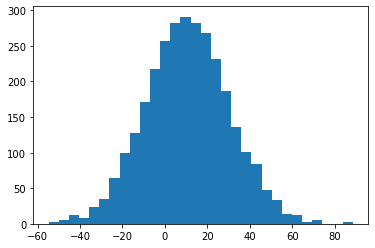

In [56]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

data = np.random.normal(loc = 10,scale = 20, size=3000)
plt.hist(data, bins=30)
print("La media de la población es:", round(data.mean(),4))

Si tomo una gran cantidad de muestras aleatorias, podré construir una gráfica centrada en el varol original del parámetro, que se corresponderá con la **distribución muestral**.

Probamos a muestrear la población y graficamos la media de cada muestra.

(array([ 1.,  0.,  1.,  0.,  5.,  3.,  6., 10., 18., 22., 33., 43., 46.,
        45., 40., 40., 39., 47., 32., 18., 11., 10., 10.,  8.,  4.,  4.,
         1.,  0.,  1.,  2.]),
 array([-4.08      , -3.04733333, -2.01466667, -0.982     ,  0.05066667,
         1.08333333,  2.116     ,  3.14866667,  4.18133333,  5.214     ,
         6.24666667,  7.27933333,  8.312     ,  9.34466667, 10.37733333,
        11.41      , 12.44266667, 13.47533333, 14.508     , 15.54066667,
        16.57333333, 17.606     , 18.63866667, 19.67133333, 20.704     ,
        21.73666667, 22.76933333, 23.802     , 24.83466667, 25.86733333,
        26.9       ]),
 <a list of 30 Patch objects>)

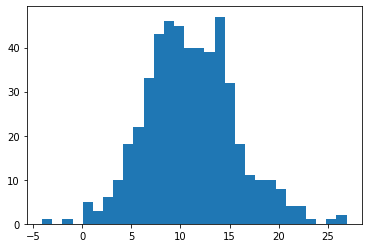

In [57]:
def muestrear(n):
    total = []
    for i in range(n):
        muestra = np.random.choice(data,20).mean()
        total.append(round(muestra, 2))
    return total

plt.hist(muestrear(500), bins=30)   

En data science la mayoría de las veces **la calidad es más importante que la calidad**. La calidad implica completitud, limpieza y precisión de cada dato. Muchas veces nos centramos en las tres Vs del Big Data (Volumen, Variedad y Velocidad), pero en ocasiones olvidamos una cuarta V, que sería la **veracidad de los datos**.

## Teorema del Límite Central
**El Teorema del Límite Central afirma que si el tamaño de la muestra es suficientemente grande, entonces la distribución muestral de la media se aproxima a una distribución normal.**

El teorema lo podemos aplicar a los estadísticos: **media, proporción muestral, diferencia de medias muestrales y diferencia de proporciones muestrales.**

![imagen](./img/Teorema+del+Límite+Central.jpg)



## Bootstrapping
**El bootstrapping es una técnica empleada para calcular la distribución muestral de un estadístico tomando muestras adicionales con reemplazamientos**. De esta manera calculamos el estadístico de cada muestra y obtenemos la distribución.

Puesto que es un remuestreo con reemplazamiento, el bootstrapping nos permite estimar la variabilidad del estadístico, utilizando una única muestra. Se trata de una aproximación excelente del proceso de muestreo de una población.

![imagen](./img/Bootstrapping.png)



## Intervalos de confianza
**Un intervalo de confianza es un rango de valores que esperamos que contenga el parámetro real.**

Por ejemplo, si estamos estudiando los votos que recibirá un candidato a la presidencia del gobierno en la CA de Cataluña, y afirmamos que recibirá un 65% de los votos, nos gustaría saber con qué grado de certeza esta afirmación es válida, o más bien en qué rango de votos nos movemos con un grado de certeza X.

**El objetivo de crear un intervalo de confianza (IC) es encontrar un rango de valores posibles para el parámetro real de la población.**

Veíamos antes que al obtener el estadístico mediante muestreo podría inducirnos a error, dependiendo de la muestra que estuviésemos observando, por lo que no sabemos si ese estadístico será de los cercanos al parámetro real, o si se encuentra en la cola de la distribución de estadísticos.